In [1]:
#importing necessary packages
import string
import re
import math
import numpy as np
from operator import itemgetter
from collections import Counter
import matplotlib.pyplot as plt
import nltk, re, pprint
nltk.download('punkt')
# nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import words
import random
from nltk.probability import FreqDist
from nltk.corpus import stopwords
# nltk.download('gutenberg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tifat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Function to get frequency distribution of the vocabulary
def get_vocabulary_list(text_name):
        words = nltk.word_tokenize(text_name.lower())
        words = [word for word in words if word.isalpha()]
        freq_dist = nltk.FreqDist(words)
        
        return freq_dist

In [3]:
# function to calculated the lidstone smoothing for a vocabulary distribution
def lidstone_smoothing(vocabulary_list, keys, alpha): 
    n = sum(vocabulary_list.values()) 
    lidstone_vocabulary_list = dict(vocabulary_list)
    
    for key in keys:
        if key not in vocabulary_list.keys():
            lidstone_vocabulary_list.update({key:0})         
    
    v = len(lidstone_vocabulary_list.keys())
    
    for key, value in lidstone_vocabulary_list.items():
        ls_prob = (value + alpha) / (n + (v * alpha))
        lidstone_vocabulary_list[key] = ls_prob
    
    return lidstone_vocabulary_list

In [4]:
# Function to compute the Conditional probability for a given class
def compute_probability(train_set, test_set, p_w):
    total_prob = 0
    
    for key, value in test_set.items():
        total_prob += value * math.log2(train_set[key])
        
    prob_given_w = math.log2(p_w) + total_prob
    return prob_given_w
    

# Answer 4:

In [5]:
# Calculating vocabulary for author class: Henry James from training set
open_file = open('corpus/james/Henry James___1.txt', 'r', encoding='utf-8')
train_james1 = open_file.read()
voc_train_james1 = get_vocabulary_list(train_james1)

open_file = open('corpus/james/Henry James___2.txt', 'r', encoding='utf-8')
train_james2 = open_file.read()
voc_train_james2 = get_vocabulary_list(train_james2)

open_file = open('corpus/james/Henry James___3.txt', 'r', encoding='utf-8')
train_james3 = open_file.read()
voc_train_james3 = get_vocabulary_list(train_james3)

train_james_vocabulary = Counter(voc_train_james1) + Counter(voc_train_james2) + Counter(voc_train_james3)

print(len(voc_train_james1), len(voc_train_james2), len(voc_train_james3), len(train_james_vocabulary))

1788 3367 3118 5562


In [6]:
# Calculating vocabulary for author class: Jack London from training set
open_file = open('corpus/london/Jack London___1.txt', 'r', encoding='utf-8')
train_london1 = open_file.read()
voc_train_london1 = get_vocabulary_list(train_london1)

open_file = open('corpus/london/Jack London___2.txt', 'r', encoding='utf-8')
train_london2 = open_file.read()
voc_train_london2 = get_vocabulary_list(train_london2)

open_file = open('corpus/london/Jack London___3.txt', 'r', encoding='utf-8')
train_london3 = open_file.read()
voc_train_london3 = get_vocabulary_list(train_london3)

train_london_vocabulary = Counter(voc_train_london1) + Counter(voc_train_london2) + Counter(voc_train_london3)

print(len(voc_train_london1), len(voc_train_london2), len(voc_train_london3), len(train_london_vocabulary))

5575 5631 3192 9686


In [7]:
# Taking Top 10 frequency words for both classes
top_james = sorted( ((v,k) for k,v in train_james_vocabulary.items()), reverse=True)[:10]
top_james_vals = [x[0] for x in top_james]
top_james_keys = [x[1] for x in top_james]

top_london = sorted( ((v,k) for k,v in train_london_vocabulary.items()), reverse=True)[:10]
top_london_vals = [x[0] for x in top_london]
top_london_keys = [x[1] for x in top_london]


In [8]:
#For Plotting the Bar Plot
fig_size = [0,0]
fig_size[0] = 15
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

Text(0.5,1,'Jack London top 10 Words Frequeny')

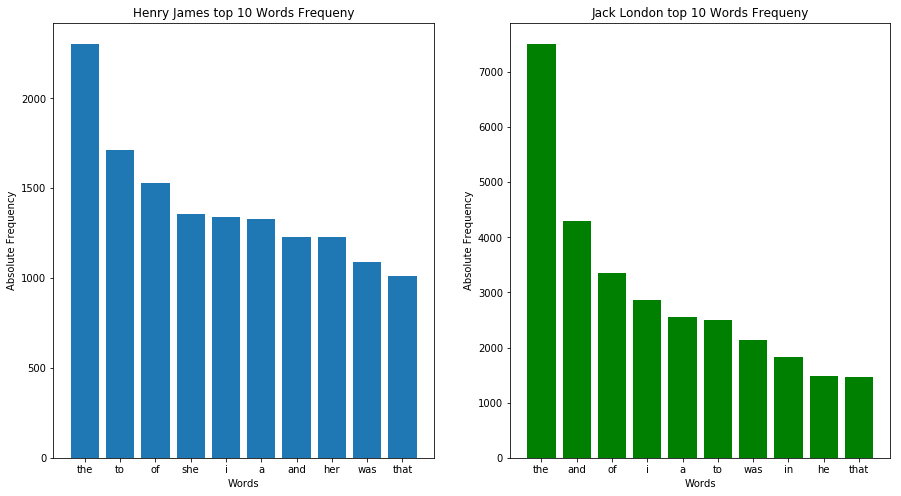

In [9]:
plt.subplot(1,2,1)
plt.bar(top_james_keys, top_james_vals)
plt.xlabel('Words')
plt.ylabel('Absolute Frequency')
plt.title('Henry James top 10 Words Frequeny')

plt.subplot(1,2,2)
plt.bar(top_london_keys, top_london_vals, color='green')
plt.xlabel('Words')
plt.ylabel('Absolute Frequency')
plt.title('Jack London top 10 Words Frequeny')

# Answer 5:

In [10]:
alpha = 0.1 # We considered alpha value as 0.1 for lidstone smoothing

In [11]:
#Applying Additive/Lidstone smoothing on the training dataset
smoothing_train_james_vocabulary = lidstone_smoothing(train_james_vocabulary, train_london_vocabulary.keys(), alpha)
smoothing_train_london_vocabulary = lidstone_smoothing(train_london_vocabulary, train_james_vocabulary.keys(), alpha)
# print(sum(smoothin_train_london_vocabulary.values()))
# for k,v in sorted(smoothin_train_london_vocabulary.items(), key=lambda p:p[1], reverse=True):
#     print(k,v)

In [12]:
test_vocabulary = {}
p_w1 = 3/6 #Probability for class: Henry James
p_w2 = 1 - p_w1 #Probability for class: Jack London

for i in range(1,4):
    file_name = 'corpus/test/test' + str(i) + '.txt'
    open_file = open(file_name, 'r', encoding='utf-8')
    test_data = open_file.read()
    voc_test = get_vocabulary_list(test_data)
    
    #Applying additive smoothing on train data for oov words in test dataset
    sm_test_james_vocabulary = lidstone_smoothing(smoothing_train_james_vocabulary, voc_test.keys(), alpha)
    sm_test_london_vocabulary = lidstone_smoothing(smoothing_train_london_vocabulary, voc_test.keys(), alpha)
    
    #Calculating probability for each class for given features(in our case all the words of testset)
    prob_given_james = compute_probability(sm_test_james_vocabulary, voc_test, p_w1)
#     print('James', prob_given_james)
    prob_given_london = compute_probability(sm_test_london_vocabulary, voc_test, p_w2)
#     print('London', prob_given_london)

    if prob_given_james > prob_given_london:
        print('test' + str(i) + '.txt is classified to author: Henry James')
    else:
        print('test' + str(i) + '.txt is classified to author: Jack London')
    
# test_vocabulary = Counter(voc_test_1) + Counter(voc_test_2) + Counter(voc_test_3)
# print(len(voc_test[1]), len(voc_test[2]), len(voc_test[3]), len(test_vocabulary))

test1.txt is classified to author: Henry James
test2.txt is classified to author: Jack London
test3.txt is classified to author: Jack London
